# Predicting Fuel Efficiency of Vehicle
In this series, we'd be going from data collection to deploying the Machine Learning model:
1. **Data Collection** - we are using classic Auto MPG dataset from UCI ML Repository
2. **Define Problem Statement** - We'll frame the problem based on the dataset description and initial exploration
3. **EDA** - Carry our exploratory analysis to figure out the important features and creating new combination of features.
4. **Data Preparation** - Using step4, create a pipeline of tasks to transform the data to be loaded into our ML model.
5. **Selecting and Training ML models** - Training a few models to evaluate their predictions using cross-validation.
6. **Hyperparameter Tuning** - Fine tune the hyperparameters for the model that showed promising result.
7. **Deploy the model using web service** -using ***Flask web framework*** to deploy our trained model on ***Heroku***

## <font color='red'>Step1: Collecting Data from UCI ML Repository</font>

In [1]:
# ! implies we are trying to run a shell command from jupyter notebook
# wget is to download directly from the link

!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 
        'Model Year', 'Origin']

df = pd.read_csv('auto-mpg.data', names=cols, na_values='?',
                comment='\t', sep=" ", skipinitialspace=True)

data = df.copy()

In [4]:
data.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
374,23.0,4,151.0,NaN,3035.0,20.5,82,1
237,30.5,4,98.0,63.0,2051.0,17.0,77,1
140,14.0,8,304.0,150.0,4257.0,15.5,74,1
43,13.0,8,400.0,170.0,4746.0,12.0,71,1
121,15.0,8,318.0,150.0,3399.0,11.0,73,1


***
## <font color='red'>Problem Statement</font>
The data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a variable in 70s and 80s.

Our aim here is to **predict the MPG value for vehicle** given we have other attributes of that vehicle.

***
## <font color='red'>Exploratory Data Analysis</font>
1. Check for Data type of column
2. Check for null values.
3. Check for outliers
4. Look for the category distribution in categorical columns
5. Plot for correlation
6. Look for new variables

In [5]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
# Check for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
# summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

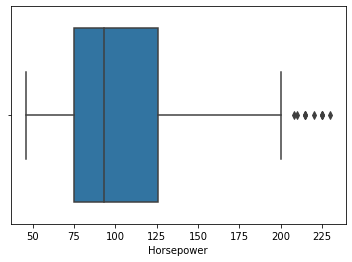

In [12]:
sns.boxplot(data.Horsepower)

In [13]:
# As HorsePower has outliers so we'll impute median instead of mean
median = data.Horsepower.median()
data.Horsepower = data.Horsepower.fillna(median)

In [16]:
# category distribution
data.Cylinders.value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [17]:
data.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [20]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

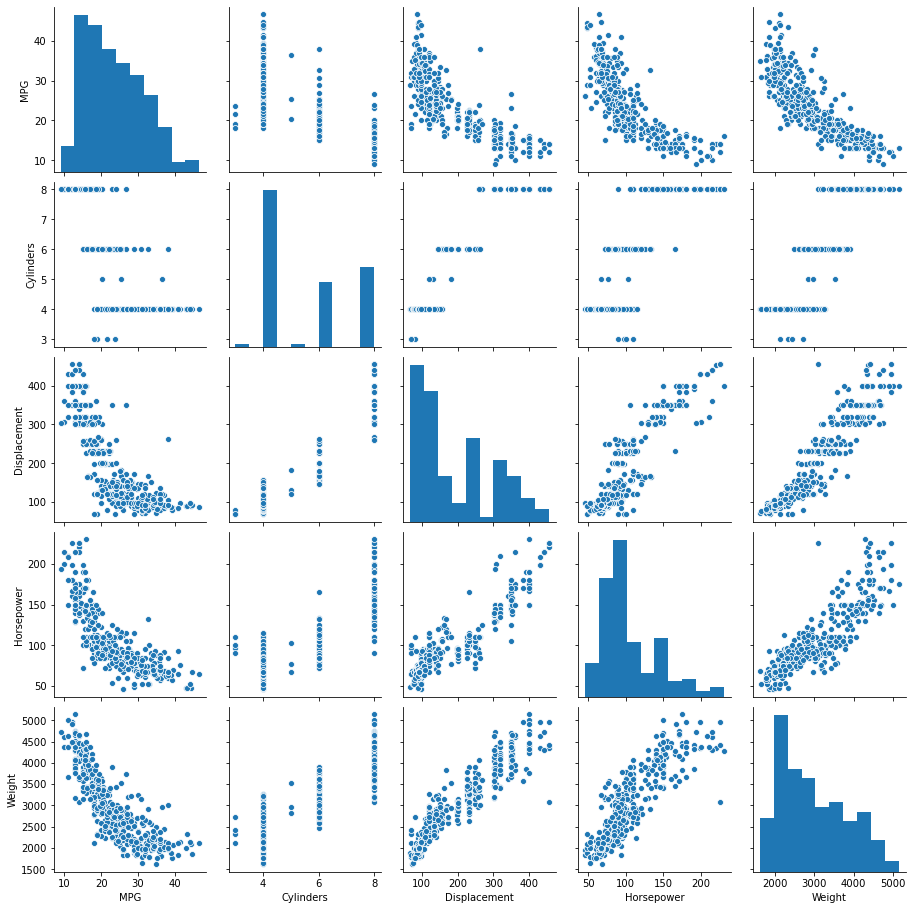

In [21]:
# Pairplots to get an intuition of potential correlation
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight']])